In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df1 = pd.read_csv("data/Youtube01-Psy.csv",encoding = "ISO-8859-1")
df2 = pd.read_csv("data/Youtube02-KatyPerry.csv",encoding = "ISO-8859-1")
df3 = pd.read_csv("data/Youtube03-LMFAO.csv",encoding = "ISO-8859-1")
df4 = pd.read_csv("data/Youtube04-Eminem.csv",encoding = "ISO-8859-1")
df5 = pd.read_csv("data/Youtube05-Shakira.csv",encoding = "ISO-8859-1")

We will train on the df1,df2,df3,df4 and test on df5.

In [3]:
test = df5['CLASS']
df5.drop('CLASS',axis = 1,inplace=True)

In [4]:
df5.shape

(370, 4)

In [5]:
df5.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice songï»¿
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ï»¿
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,PrÃ¬Ã±Ã§eÅÅ ÃliÅ ÅÃ¸vÃª DÃ¸mÃ­Ã±Ã¸ MÃ¢Äi...,2015-05-28T21:00:08.607000,I love song ï»¿
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach..."
4,z133stly3kete3tly22petvwdpmghrlli,Analena LÃ³pez,2015-05-28T17:08:29.827000,shakira is best for worldcupï»¿


In [6]:
data = [df1,df2,df3,df4]
final_df = pd.concat(data)

<AxesSubplot:title={'center':'spam and ham'}>

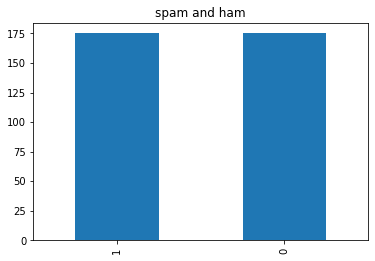

In [7]:
df1 ['CLASS'].value_counts().plot.bar(title='spam and ham')

In [8]:
final_df.shape

(1586, 5)

In [9]:
final_df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^...,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1


<AxesSubplot:title={'center':'Spam Classification'}>

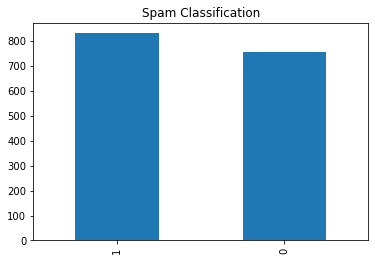

In [10]:
final_df['CLASS'].value_counts().plot.bar(title='Spam Classification')

In [11]:
comment = final_df['CONTENT']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(comment)
X_train_counts


<1586x4169 sparse matrix of type '<class 'numpy.int64'>'
	with 20570 stored elements in Compressed Sparse Row format>

In [13]:
# Below lines of code are used to achieve it.
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1586, 4169)

In [14]:
!pip install git+https://github.com/hyperopt/hyperopt-sklearn.git

  Cloning https://github.com/hyperopt/hyperopt-sklearn.git to c:\users\dell\appdata\local\temp\pip-req-build-kmg_wblj


  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn.git 'C:\Users\Dell\AppData\Local\Temp\pip-req-build-kmg_wblj'
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/hyperopt/hyperopt-sklearn.git 'C:\Users\Dell\AppData\Local\Temp\pip-req-build-kmg_wblj'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf-svm', SGDClassifier(loss='modified_huber', penalty='l2',
                     alpha=1e-3, random_state=42)),])


In [16]:
target = final_df["CLASS"]
text_clf_svm.fit(comment,target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf-svm',
                 SGDClassifier(alpha=0.001, loss='modified_huber',
                               random_state=42))])

In [17]:
target.shape

(1586,)

In [18]:
predicted_svm = text_clf_svm.predict(df5['CONTENT'])
print(predicted_svm)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(test, predicted_svm)

0.9216216216216216

In [20]:
from sklearn.metrics import f1_score
f1_score(test, predicted_svm)

0.9123867069486404

In [21]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import joblib

In [22]:
df= pd.read_csv("data/YoutubeSpamMergedData.csv")
df_data = df[["CONTENT","CLASS"]]
# Features and Labels
df_x = df_data['CONTENT']
df_y = df_data.CLASS
# Extract Feature With CountVectorizer
corpus = df_x
cv = CountVectorizer()
X = cv.fit_transform(corpus) # Fit the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.33, random_state=42)

In [23]:
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB()
clf_NB.fit(X_train,y_train)
clf_NB.score(X_test,y_test)
predictions = clf_NB.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for MNB: ", val1, "\n")

*Accuracy score for MNB:  91.95046439628483 



In [24]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
SVM.score(X_test,y_test)
predictions = SVM.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val2, "\n")

*Accuracy score for SVM:  93.96284829721363 



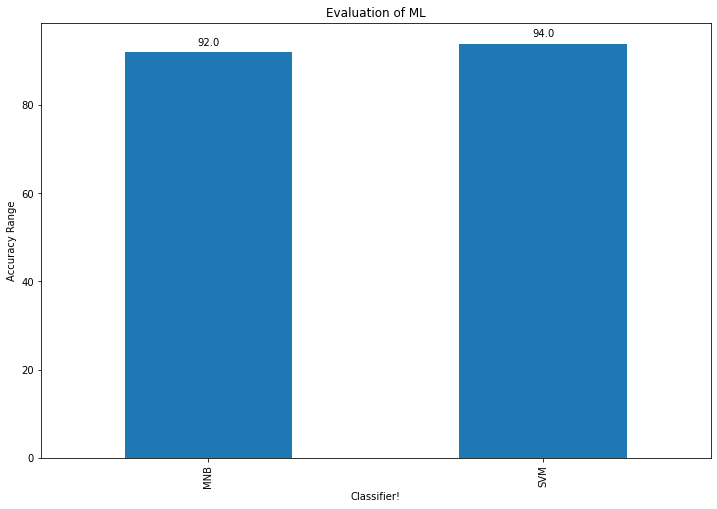

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [val1,val2]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = ['MNB','SVM']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

In [ ]:
from flask import Flask,render_template,url_for,request
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import joblib
from werkzeug.wrappers import Request, Response

app = Flask(__name__)

@app.route('/')
def home():
	return render_template('home.html')

@app.route('/predict',methods=['POST'])
def predict():
	df= pd.read_csv("data/YoutubeSpamMergedData.csv")
	df_data = df[["CONTENT","CLASS"]]
	# Features and Labels
	df_x = df_data['CONTENT']
	df_y = df_data.CLASS
    # Extract Feature With CountVectorizer
	corpus = df_x
	cv = CountVectorizer()
	X = cv.fit_transform(corpus) # Fit the Data
	from sklearn.model_selection import train_test_split
	X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.33, random_state=42)
	#Naive Bayes Classifier
	from sklearn.naive_bayes import MultinomialNB
	clf = SVC()
	clf.fit(X_train,y_train)
	clf.score(X_test,y_test)
	#Alternative Usage of Saved Model
	# ytb_model = open("naivebayes_spam_model.pkl","rb")
	# clf = joblib.load(ytb_model)

	if request.method == 'POST':
		comment = request.form['comment']
		data = [comment]
		vect = cv.transform(data).toarray()
		my_prediction = clf.predict(vect)
	return render_template('result.html',prediction = my_prediction)

if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 9000, app)

 * Running on http://localhost:9000/ (Press CTRL+C to quit)
